In [1]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
import pandas as pd

In [2]:
data = pd.read_csv(path)

In [3]:
world_corona = pd.DataFrame(data)

In [4]:
world_corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25


In [5]:
total = world_corona.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [6]:
total['total'] = total.sum(axis=1)

In [7]:
world_corona = world_corona.join(total['total'])

In [8]:
world_corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,total
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,19290
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,14113
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,55923
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,18181
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,515


In [9]:
top_10 = world_corona.sort_values(['total'], ascending=True, axis=0)

In [10]:
top_10 = top_10.tail(10)


In [11]:
top_10.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,total
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,36138,37183,38496,39983,40956,41889,42797,44293,45325,846115
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,78546,82329,86306,90980,95591,98674,101790,104912,107773,1582146
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,79494,80868,82211,83505,84802,85996,87026,88194,89328,2320567
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,108692,114217,120067,124743,129044,133495,138078,143464,148377,2368754
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,146923,146906,151808,154188,156921,154715,157026,158636,160292,3269585
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,141397,143342,145184,147065,148291,150648,153129,154999,156513,3730695
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,190839,191726,198674,200210,204178,208389,213024,219764,223759,4959878
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,172434,175925,178972,181228,183957,187327,189973,192994,195351,5131965
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,68128,68128,68128,68128,68128,68128,68128,68128,68128,5135290
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,699706,732197,758809,784326,811865,840351,869170,905358,938154,15530314


In [12]:
top_10.reset_index(inplace=True)

In [13]:
top_10.drop(['index'], axis=1, inplace=True)

In [14]:
top_10['total_10k'] = top_10['total']/10000

In [50]:
import matplotlib.pyplot as plt
import numpy as np

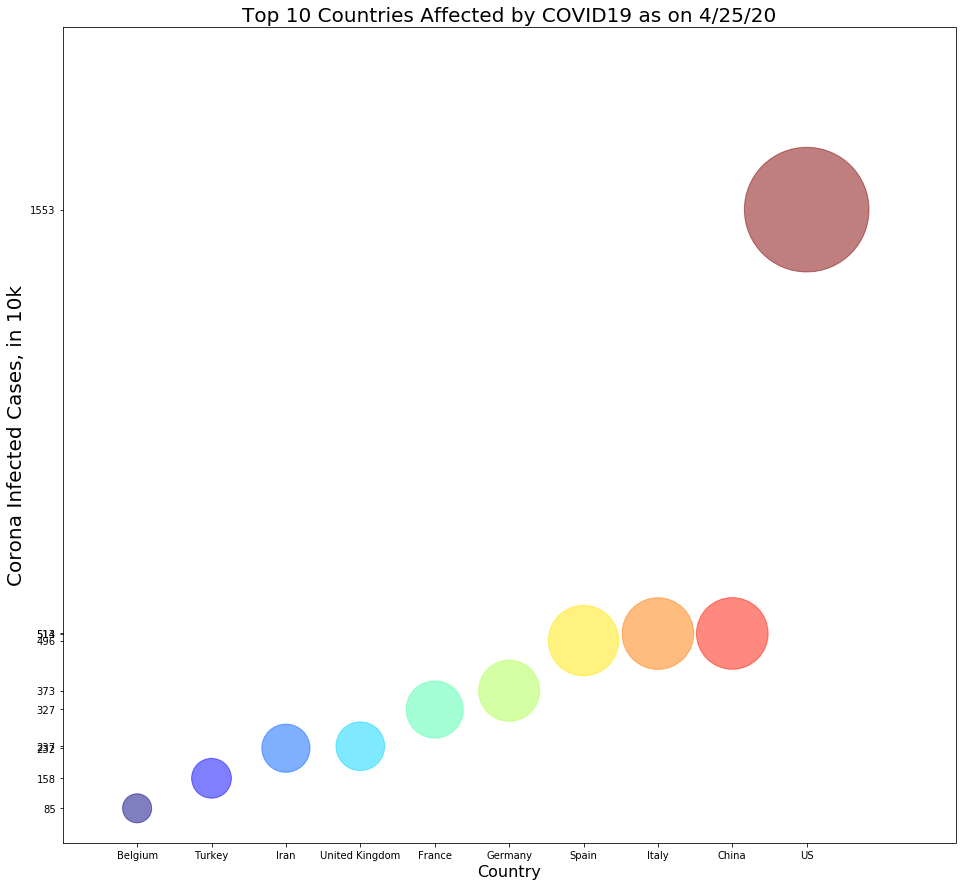

In [64]:
labels=[]
for i,n in zip(top_10['total_10k'], top_10['Country/Region']):
    labels.append('No of Cases: ' + str(i) + ' in' + n )
%matplotlib inline
col = range(0,10)
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
ax.scatter(top_10['Country/Region'],top_10['total_10k'],alpha=0.5, s=top_10['total_10k']*10, c=col, cmap=plt.cm.jet)
ax.set_ylim(0,2000)
ax.set_xlim(-1,11)
ax.set_yticks(top_10['total_10k'])
ax.set_title("Top 10 Countries Affected by COVID19 as on " + top_10.columns[-3], fontsize=20)
ax.set_xlabel("Country", fontsize=16)
ax.set_ylabel("Corona Infected Cases, in 10k", fontsize=20)
plt.show()